# Cracking the Culinary Code
### Using Yelp Reviews to Guide Foodies towards their Perfect Plate

Analee Graig , Zoya Shafique, Rahul Chandani, Syed Faquaruddin Quadri \\
DSE I2210 Final Project 

## **Abstract**

Thoughtfully built recommender systems are a powerful tool for online businesses to drive revenue. In the context of Yelp, recommender systems can be used to drive ad revenue by encouraging users to spend more time on the platform. If Yelp is effective in recommending users with restaurants they might enjoy, users might come to rely more on Yelp for this feature, thus increasing engagement with the platform and driving ad revenue. In this project, we use the Yelp businesses dataset to develop several restaurant recommender systems for users in New Orleans. Our final selected model was a Collaborative Filtering model based on restaurant categories and had an RMSE and MAE of 0.739 and 0.533, respectively, on the test set. This model outperformed our baselines by 15% on both metrics.


## **Introduction**

Recommender systems are of increased interest in academic research for their application to a number of problems found in industry. Recommender systems in industry are primarily used as a way for businesses to encourage engagement from users with their product. This engagement can be translated into profit through ad revenue, as is the case with Yelp, or purchasing more products, as is this case with Amazon. Additionally, recommender systems are a unique and interesting problem in machine learning because of the inherent sparsity within the user-product universe, i.e. that for however many thousands or millions of products that exist within a marketplace, there’s likely a very small number of users that map to the majority of those products. Because of this, recommender systems typically require a different set of approaches than more traditional machine learning problems.

We investigate this problem by creating three distinct recommendation systems for restaurants in New Orleans based on the Yelp businesses dataset. First, we perform EDA on our dataset to identify similar types of restaurants, ratings, and user behavior. Next, we expose the limitations of applying traditional machine learning algorithms and methods to construct an effective recommender by employing Lasso Regression and Naive Bayes. Next, we explore different methods for creating a recommender, including collaborative filtering on Restaurants and Restaurant Categories, and content-based filtering based on the restaurant reviews. Finally, we compare the methods selected on RMSE/MAE and the recommendations generated for a selected user.



## **Data**

In this section, we introduce the dataset, explain how we preprocessed and describe our EDA. We base our recommendation system on the [Yelp Dataset](https://www.yelp.com/dataset). The Yelp Dataset is an open source dataset that is released annually by Yelp and consists of raw and unprocessed data for a subset of  the businesses, reviews, and users found on Yelp. The original dataset is available as six different JSON files, one each for business data, user reviews, user data, check in data, tips – which are shorter reviews – and photo data. In total, the dataset contains information for 6,990,280 reviews from 1,987,897 users across 150,346 businesses in 11 different cities across the United States and Canada.

### **Data Acquisition, Preprocessing and Cleaning**

Of the six files provided in the original Yelp Dataset, our recommender system relies on two: Yelp's business data and review data. The business data contains information about the businesses such as business_id, categories that the business falls into, review count, stars (average rating), and name. The review data includes user-specific reviews and ratings of various businesses. Before we could start working with these data files, we had to parse the JSONs into CSV files as they contained many layers of nested dictionaries, as shown below. We were unable to completely extract all of the nested dictionaries and therefore had to discard some attributes in the data. 


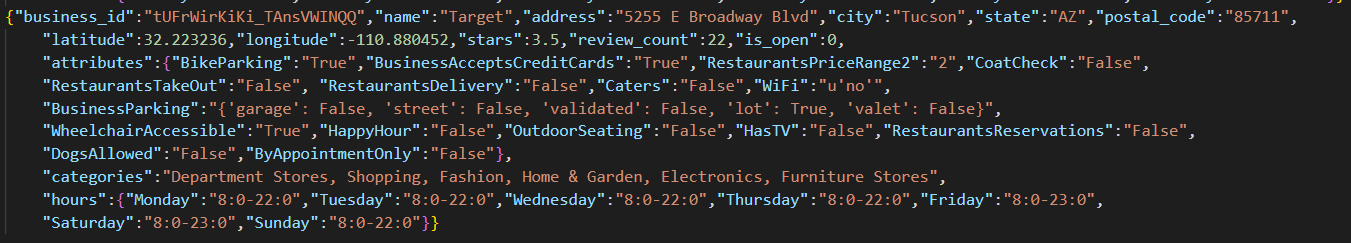

The preprocessing stage involved filtering the businesses to retain only restaurants by checking the 'categories' field for the term 'Restaurants.' Furthermore, unnecessary features, such as if a user review was voted as ‘funny’ or ‘cool’, were dropped from the dataset to keep only relevant data. After narrowing down to the features we deemed most relevant, we cleaned both the business data and the user reviews. As we were working with real data, there was a lot of cleaning to be done. Namely, many cities were misspelled or written in different cases, causing them to be detected as two different cities. For instance, New Orleans appeared in the dataset as both ‘New Orleans’ and ‘NEW ORLEANS’. We consolidated such labels into a single label. Many duplicate restaurant reviews were also present; in some cases, users had visited a restaurant twice and left the same star rating for both visits. In other cases, users had left two different ratings for both of their visits. In the former scenario, we dropped one of the reviews whereas in the latter, we averaged the reviews together. We also found some reviews written in foreign languages, which we dropped. Lastly, there were many restaurants labeled with irrelevant categories such as ‘Adult Entertainment’, ‘Historic Site’, and ‘Government Services’. We dropped these categories and only kept categories that were directly related to types of cuisines or food establishments. 

We also cleaned the text data by removing punctuation and contractions. Extra white spaces and stop words were also removed. The filtered business data was then merged with the review data according to the 'business_id' to create a combined dataset. After all the preprocessing and cleaning, we were left with 469,337 reviews for 2,255 businesses across 201,608 users.


### **Exploratory Data Analysis**

A large part of our EDA was based around trying to understand the types of restaurants present in New Orleans. We had two goals: 1) to determine different types of restaurants and see if they were rated differently by users and 2) to understand the types of users present and their rating behavior.
 
To start, we looked at the top 20 categories and the percentage of total restaurants that had that category:
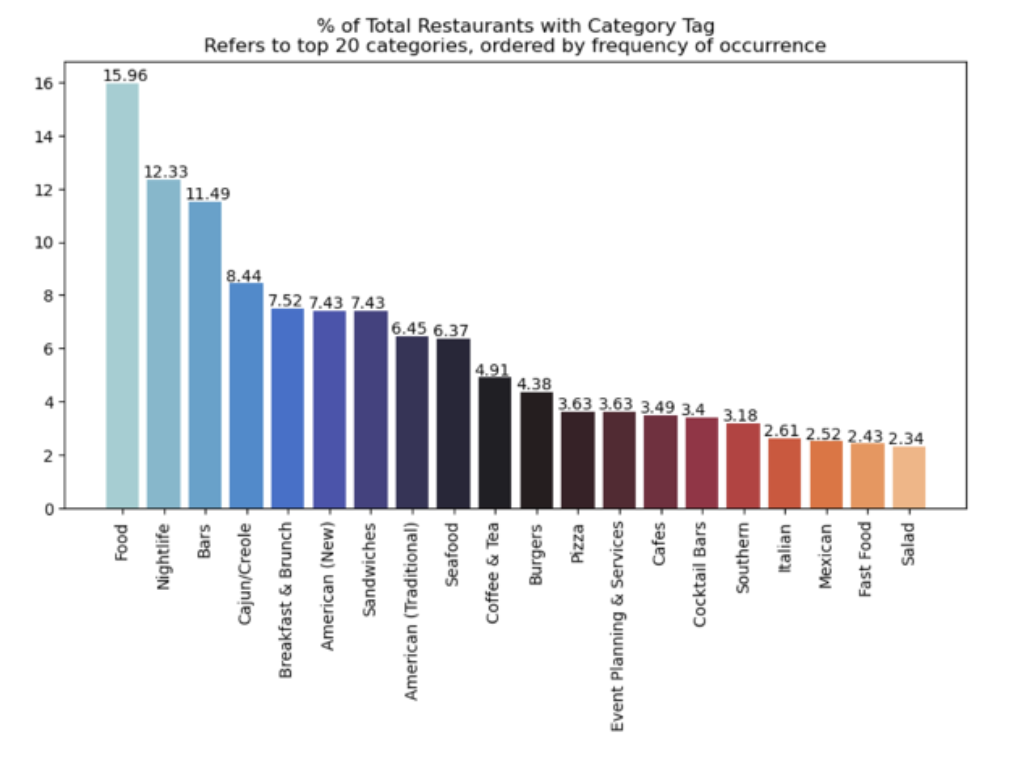


From here, we had several takeaways, most notably that most tags, even within the top 20, have very few restaurants associated with that tag. We took this to suggest the diversity of the New Orleans restaurant scene, but it’s also likely that since these tags are assigned by individual users, it could be a function of users just not inputting category tags. This also again highlights the sparsity of our dataset. A second takeaway is the prominence of Nightlife and Bars as being the second and third highest category tag. We took this to suggest the prominence of nightlife in the New Orleans restaurant scene, as these are primarily nightlife venues that also serve food.

Next, we wanted to look at whether there was a difference in average rating for among the top categories:

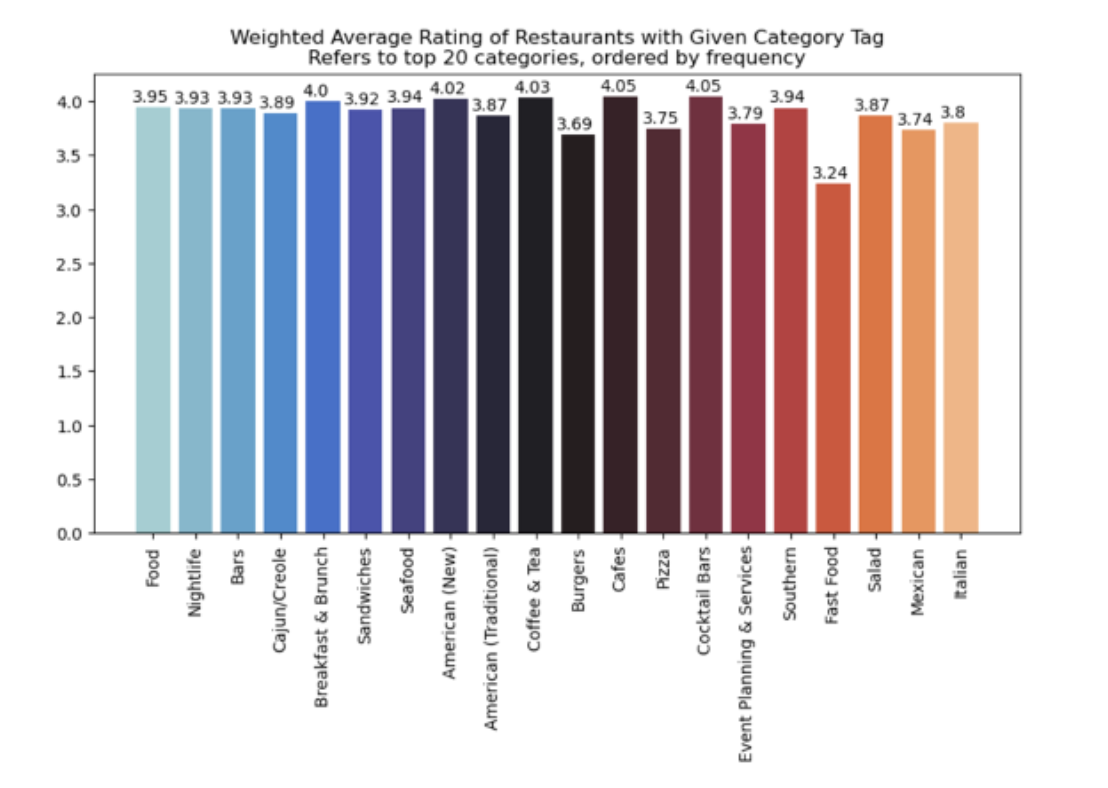

Our main takeaway from here was that there’s not a huge variation in average star rating for the top 20 categories, except for ‘Fast Food’ restaurants which have a noticeably lower average rating of 3.24. This was disappointing but not totally surprising, as most restaurants are rated quite highly, and the variance in restaurant rating is generally quite low. Another takeaway is that the lowest rated categories, namely ‘Burgers’, ‘Pizza’, ‘Mexican’ and ‘Italian’, have subsets within them that correspond to fast food chains like McDonalds, Taco Bell and Domino’s Pizza.

Next, we used different clustering methods to cluster the restaurant categories and attributes to determine the different types of restaurants. First, we used k-means clustering and DBSCAN to cluster the numeric attributes in our dataset. Neither produced particularly interesting results. DBSCAN almost entirely clustered based on geography, and the k-means clusters were more predictable but less interesting:

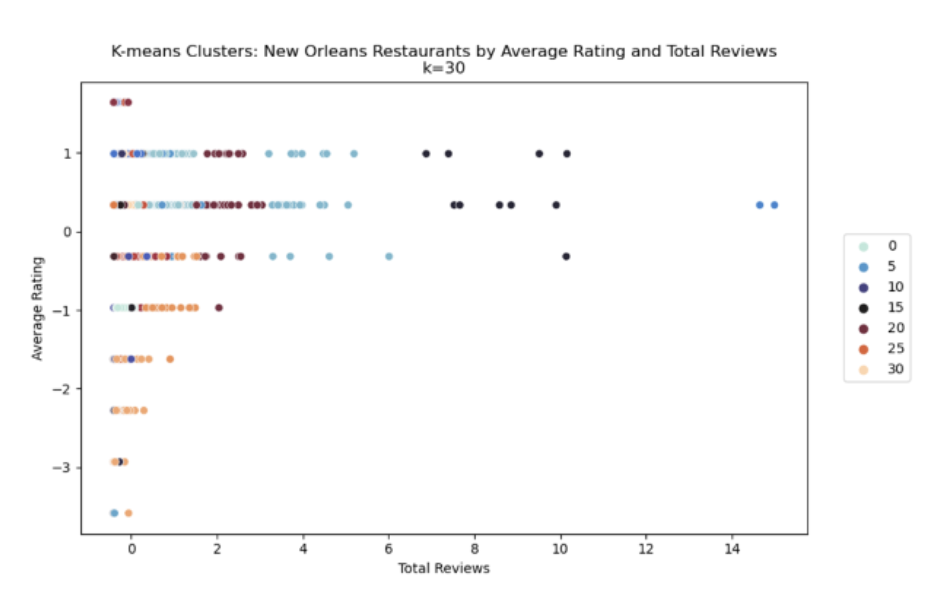

We can see that restaurants are primarily clustered around average rating, and within that, clustered based on longitude and latitude. This shouldn’t be surprising and isn’t particularly interesting given that these were our input variables.

Next, we used k-modes clustering to cluster based on the restaurant categories. Our goal again was to try to determine the different kinds of restaurants within our dataset, hoping that this would provide us clues into how to clean our data to address data sparsity:

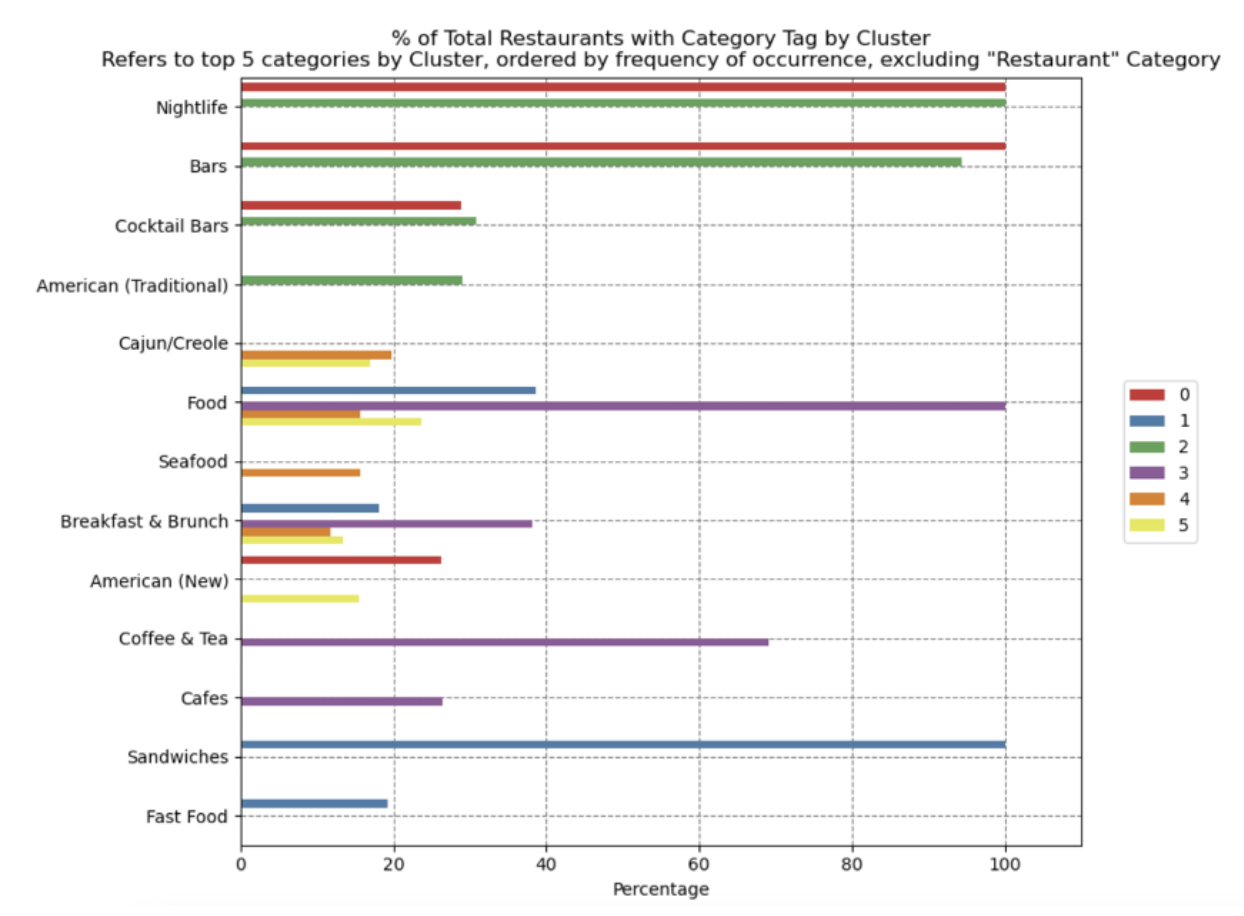

Our main takeaway here was something that came up earlier as well, which is that there’s a clear delineation between nightlife venues that serve food and more traditional sit-down restaurants. Additionally, we noticed clusters of restaurants that come up later as well, notably the Cajun/Creole restaurants that New Orleans is famous for, Café/Coffee shop type places and Fast-Food restaurants.

The last part of our EDA was around trying to understand user behavior and the relationship between total reviews and average rating:
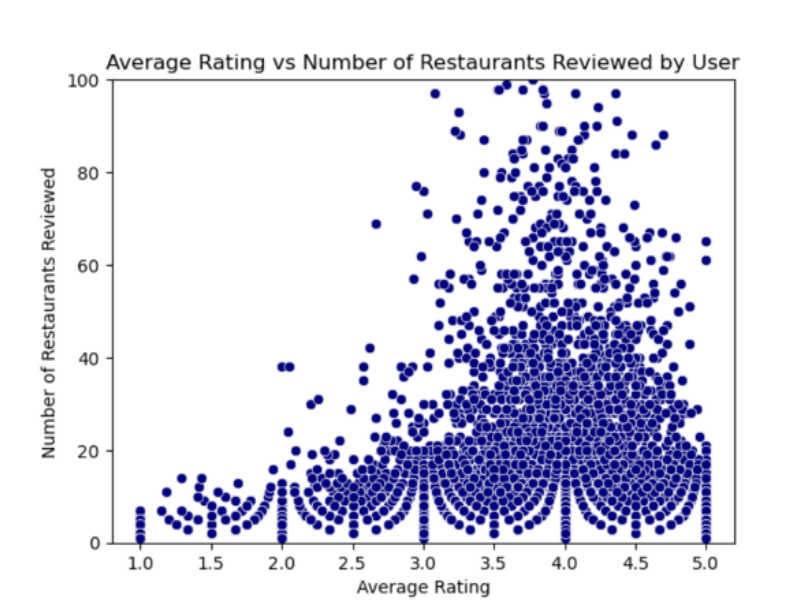

From the above, we can see that there is a relationship between the number of restaurants a user has reviewed and the average rating the user has given. The more restaurants a user has reviewed, the more likely it is that they have a higher average rating. In fact, users with an average rating between 1 and 2 rated no more than max 40 restaurants, with the majority rating fewer than 20 restaurants. We took this to mean that we can ‘underweight’ these users in our further work, as it’s likely these users aren’t representative of a restaurant’s distribution of ratings.

## **Methods**

We constructed two recommendation systems: a collaborative filtering based engine and a content filtering based engine. We attempted three different approaches for the collaborative filter as the sparsity of our data was more than 90%. Specifically, we looked at finding similar users based on (1) their ratings for individual restaurants and (2) their average rating for each category of restaurant. To construct our content based engine, we first analyzed how closely the user text reviews approximate the star rating left by the user. To do so, we built a Naive Bayes classifier to predict the star rating with the user text reviews as input. Finally, a content filtering based engine using the text reviews for each user was built. 

To gauge the performance of our recommendation engines, we tested three baseline methods: predicting the average user rating as a proxy for the user rating, predicting the average business rating as a proxy for the user rating, and using Logistic Regression to predict user rating based off of features in the business and reviews data. All methods were evaluated using root mean squared error (RMSE) and mean absolute error (MAE). We selected these methods as we saw them to be most commonly used to evaluate recommenders.


### **Baselines**

#### **Simple Baselines**

Analogous to a ‘random guessing’ baseline, we predicted the average user rating and the average business rating for each review left by a user. The results are reported below for the test set. The average user rating is a closer approximation to the ratings left by the user for a business compared to the average business rating, which is to be expected. 

| Model | RMSE | MAE | 
| --- | ----------- | ------- |
| Average User Rating | 0.991 | 0.781 |
| Average Business Rating | 1.023 | 0.787 | 



#### **Lasso Regression:**

For one of our baselines, we constructed a Lasso Regression model that aimed to predict a user’s rating based on the attributes and categories within our dataset, including the average user rating, average business rating, postal code, and restaurant categories. The goal here was 1) to determine how effective a lasso regression model was at predicting the outcome, 2) to determine the variables most associated with higher ratings, and 3) to expose the limitations of traditional machine learning methods when applied to recommenders. We selected a lasso model in an attempt to help mitigate our sparse categories, hedging that most of these coefficients would shrink to zero.
 
Our most damning takeaway was around point 3), i.e., that traditional machine learning methods don’t work well when used for recommender because of the sparsity inherent within the dataset. For starters, R2 score was quite low, indicating that our model was a poor fit for the data.


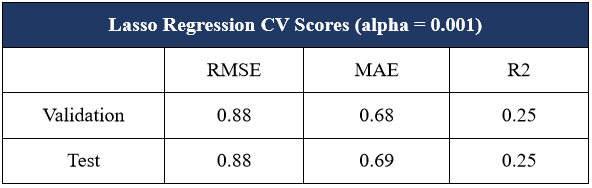

Additionally, our model had a hard time converging when using the alpha parameter selected by GridSearchCV, which combined with the low R2 score, suggests that the linear model just isn’t a good fit for this dataset. We had initially considered inputting null ratings using Lasso Regression, but after seeing the low R2 and the issues we had with converging, we decided to can this idea.



Despite this, we’ve included the top 20 coefficients Lasso selected below as it calls out a few things we observed during the EDA:
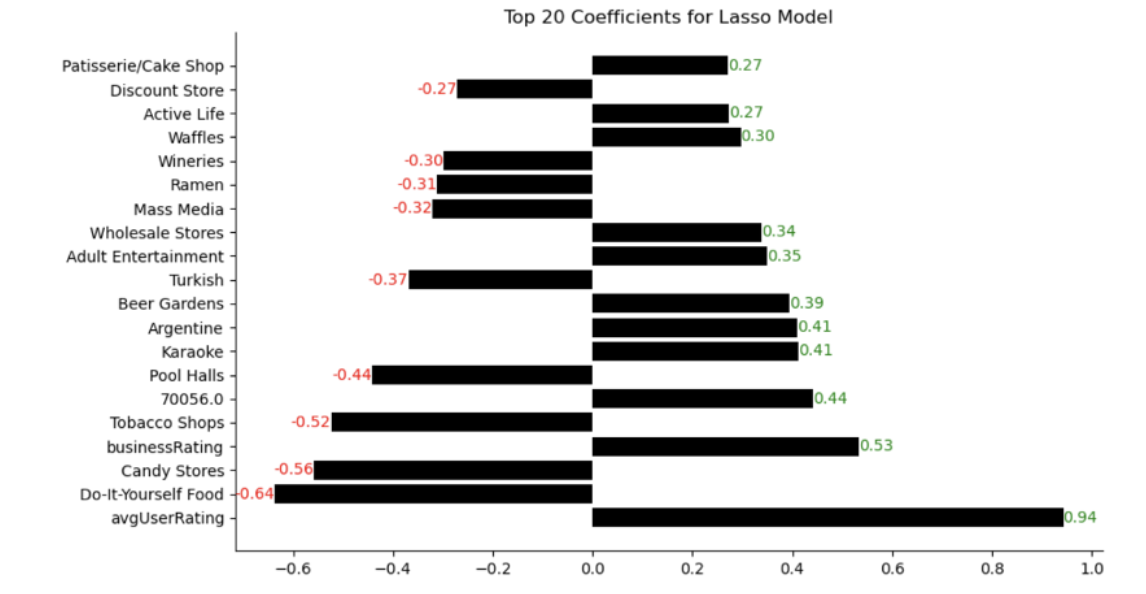

Primarily, it highlights the relationship between both the average user rating and the average business rating in predicting how users will rate a restaurant. Additionally, it highlights specific categories that either detract from or enhance the potential for a good review.


#### **Naive Bayes Classifier on Text Reviews**

As a second baseline, we implemented a Naive Bayes Classifier. We selected Naive Bayes because it's a generative machine learning algorithm that is very fast in implementation. It uses the learned conditional probabilities via Bayes theorem to generate the probability that a particular feature belongs to a specific class. Naive Bayes works by storing the probability of the classifications we observe in our training data, as well as the conditional probabilities of all features we observe given that classification. Therefore, when attempting to predict the probability of a piece of test data given its features, we can use Bayes Rule to determine the probability of that piece of data belonging to a specific classification:

$P(Class) = c$

$P(F1|Class) = x$

$P(F2|Class) = y$

$P(F3|Class) = z$

$P(Class|F1,F2,F3) = P(F1|Class).P(F2|Class).P(F3|Class).P(Class)$

$P(Class|F1,F2,F3) = x.y.z.c $

To generate the results we first preprocess the data according to the requirements. The first step is to remove the punctuations and stopwords with this function:

In [ ]:
def text_preprocessing(text):
    chars = [x for x in text if x not in string.punctuation]
    without_punctuations = ''.join(chars)
    removed_stopwords = [word for word in without_punctuations.split() if word.lower() not in stopwords.words('english')]
    processed_text = " ".join(removed_stopwords)
    return processed_text

This function is used as an analyzer for the count vectorizer. To better work on the data, we use only 50,000 data points rather than the 1M data points as the time to vectorize such a large amount of text data will take time out of bounds.
After splitting the data into test and train we apply the Multinomial Naive Bayes of Sklearn on the train data:


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

The accuracy of the model is almost 64.5%, and the classification report and confusion matrix looks somewhat like this:
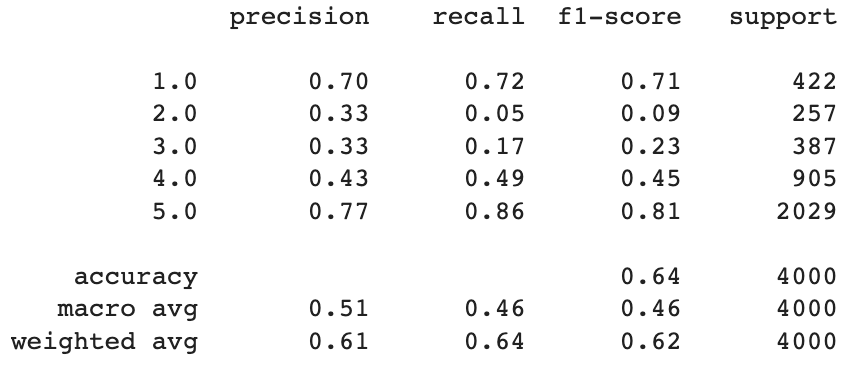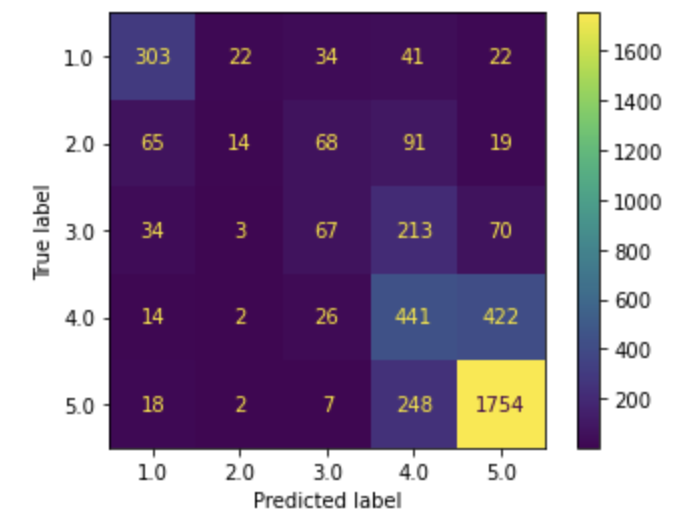

We see that this model is predicting the end points of star ratings quite accurately but isn’t performing well in predicting the ratings of 2,3 and 4. Note that we observed this in SVM and Logistic Regression as well.

### **Recommender Models**

#### **Collaborative Filtering - Individual Restaurants**

We attempted to build a collaborative filter based on the individual restaurants. Ideally, the individual ratings that users left for restaurants can be used to find similarities between users by matching users who have similar ratings for a given restaurant. Once similar users have been found, we can construct recommendations based on restaurants that similar users have rated highly but the user of interest has not been to before. 

To prepare our data for collaborative filtering, we removed users who had less than 10 reviews in the dataset and restaurants who had less than 50 reviews. The dataset was then converted into an interaction matrix. This matrix is a two-dimensional structure where rows represent unique restaurants (business_id) and columns represent unique users (user_id). The cell values correspond to the restaurant rating a user has provided. If a user hasn't rated a restaurant, the value is filled with NaN values. As not all users had rated every restaurant in the dataset, we were left with a very sparse matrix; specifically, our pivot table had a sparsity of 96%. We split the constructed table into train, validation, and test sets by sampling 30% of the ratings without replacement for each user. Essentially, 30% of the ratings left by a user were used in the test set and another 30% were used in the validation set. These values were zeroed out in the original pivot table, which was then used for our train set. As we removed ratings, we were left with a matrix that was more sparse than the original matrix. 

To construct the collaborative filter, we normalized our train set by subtracting the average user rating from each row. With the data centered around the mean, we filled all missing values with 0 and performed singular value decomposition (SVD) on the resulting matrix. The number of latent factors used in the decomposition was determined by evaluating the RMSE and MAE between the reconstructed matrix and the original pivot table.


We found that due to the high sparsity of the matrix, this approach failed to beat two of the three baselines. As can be seen from the K vs. Error plots below, different numbers of latent factors had negligible impact on error in reconstruction. Therefore, in the face of such high sparsity, a collaborative filter based on individual restaurants failed to beat the baselines. As such, we attempted to group the restaurants into categories in order to reduce the sparsity. 

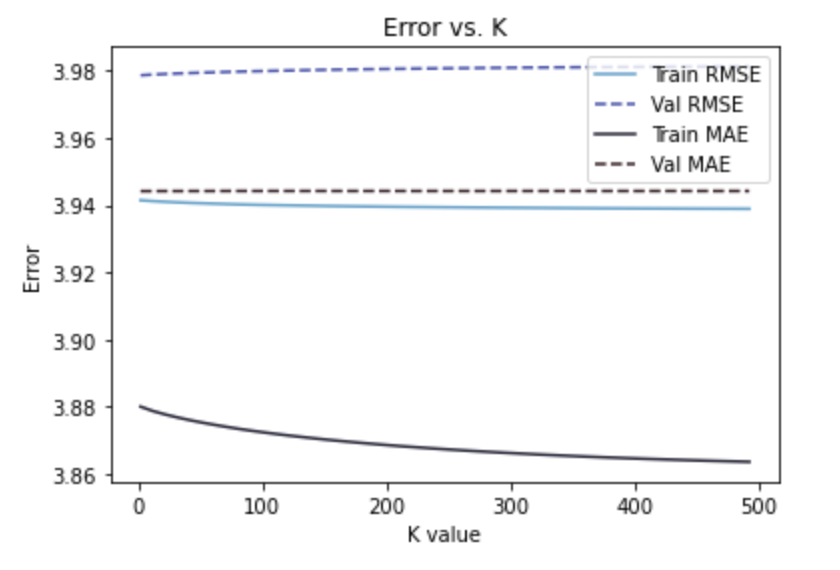

#### **Collaborative Filtering - Restaurant Categories**

One method we tried for building our recommender was collaborative filtering based on the restaurant categories. Our motivation here was 1) the observation that restaurants could be clustered based on their category tags, 2) users within our dataset tended to have preferences for certain categories over others and 3) it provided a way to mitigate sparsity as there are fewer total categories than there are restaurants.

To do this, we constructed our interaction matrix as such, with users as rows, categories as columns, and the average star rating that a user gave a restaurant in that category within the cell values:

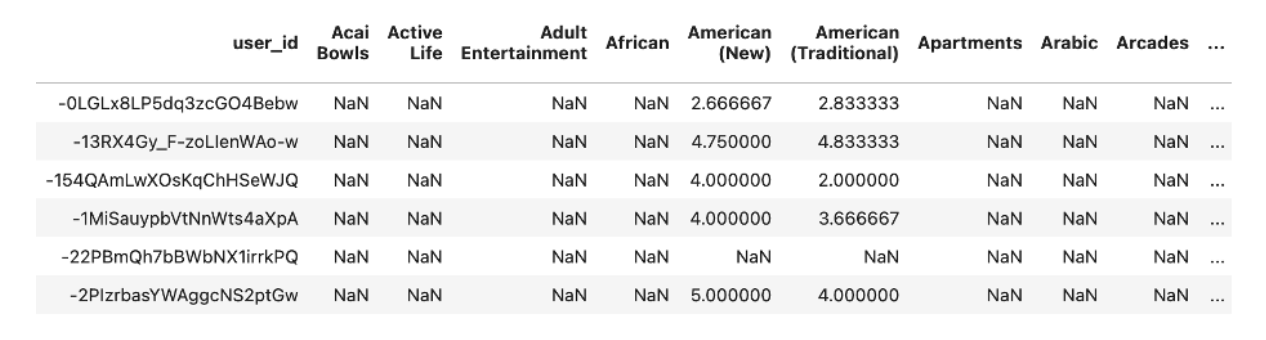


This resulted in a sparsity of 83%, much lower than what we had when using the restaurant ids as columns rather than the categories.
 
Next we split our data into test, training and validation sets and normalized the data. One thing to note here is that sklearn does not provide a train_test_split function that works for recommenders, so we had to create our own. After normalizing the data, we performed SVD on our training set and used the validation set to determine the optimal value of k by minimizing the RMSE and MAE, where k refers to the number of singular values.


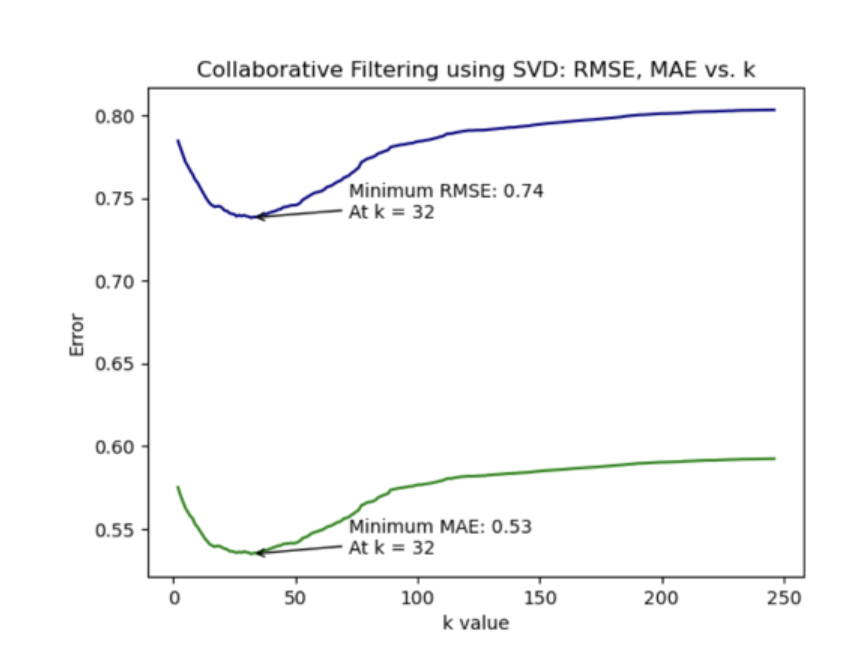

From the above, we can see that RMSE and MAE are minimized when k = 32. One note here is that the change in RMSE and MAE as k increases is much different from what we saw when using an interaction matrix of users vs restaurants. The graph using users vs restaurants show RMSE and MAE decline exponentially as k increases, whereas here, we see RMSE and MAE minimized around k = 32 and then increase as k increases. Our guess here is that since the users vs restaurants matrix is more sparse, it requires a large value of k to learn off of, whereas in our case, since our matrix is less sparse, we can get away with a smaller value of k. A second guess is that the model is overfitting with higher values of k, and there are categories in our dataset that are being retained that aren't useful. This somewhat ties in with what we saw in the Lasso regression, where most business categories were sent to 0 and weren't helpful in predicting a user's star rating.

Next, we used the optimal value of k = 32 determined by the above to perform SVD on the test and validation sets, and generate the RMSE and MAE:

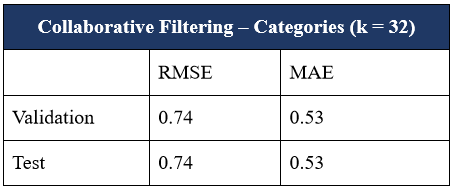

After rounding, the RMSE and MAE for both the test and validation sets were identical. This suggests that are model wasn’t over or underfitting and was a good fit for the data. Additionally, our validation RMSE and MAE are both lower than that of the Lasso regression.
 
Lastly, we performed cosine similarity to identify similar users used this to recommend restaurants. More precisely, we wrote a function that for an inputted user, similarity matrix and desired top n:

1.   Identifies the top three most similar users
2.   Takes users top 5 highly rated categories, and takes average of similar users ratings in those top 5 categories
3. Identifies restaurants in these top 5 categories that the top 3 most similar users have rated
4. Filters out closed restaurants and restaurants the user of interest has already rated
5. Takes average rating of the remaining restaurants across the top 3 users
6. Returns top n restaurants based on sorted average rating


For example, user id **‘-0LGLx8LP5dq3zcGO4Bebw’** returns the following recommendations:

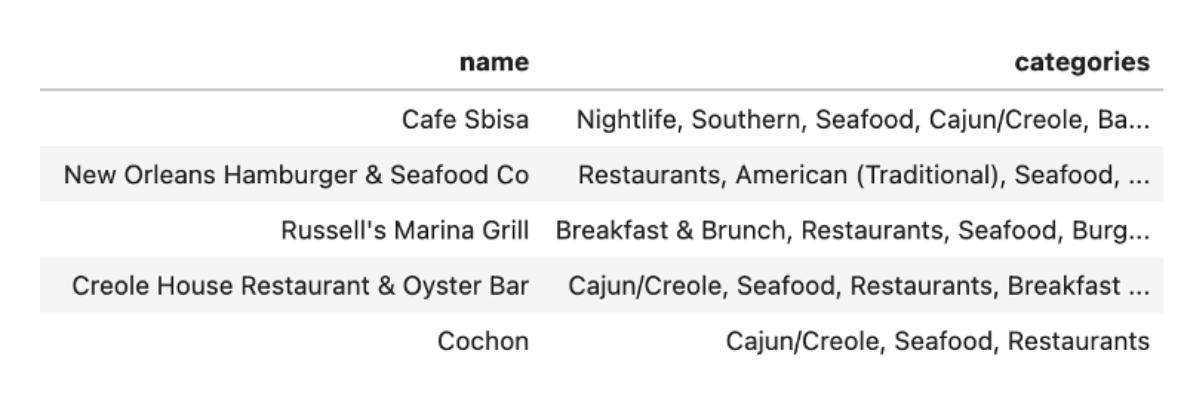

One thing to note here is that again something we observed during the EDA, which is that there are clusters of restaurants within our dataset that users tend to prefer over others. This user, for example, shows a clear preference for Cajun/Creole and Seafood restaurants as evidenced by their top recommended restaurants.

Lastly, we also tried an additional method based on the above using cleaned restaurant categories, where the categories were consolidated into groups based on work that Zoya did. The goal here again was primarily to mitigate the sparsity by consolidating and removing unnecessary categories. We were able to use this method to reduce the total categories to roughly 85 from the original of 248, reducing the total sparsity from 83% to 74%. We then reran the steps outlined above with the goal of seeing the impact on RMSE and MAE. Unfortunately, as shown below, the impact on RMSE was incredibly marginal:

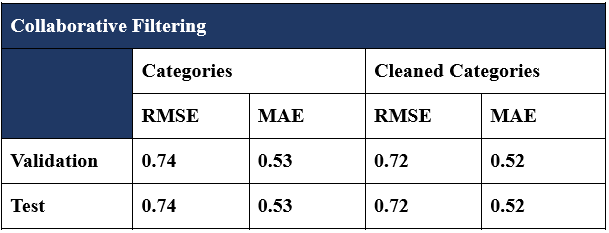

As we can see from the above, the effect of category cleaning was minimal on both RMSE and MAE. Interestingly though, while the effect on RMSE and MAE was minimal, the recommender recommended different restaurants to the same user ‘-0LGLx8LP5dq3zcGO4Bebw’:

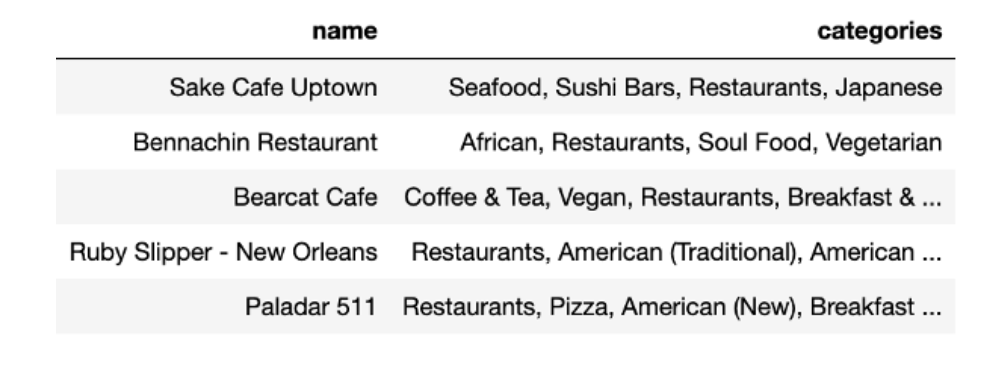

One note is that we had to adjust our recommender function to accommodate the top 10 categories rather than the top 5, as the top 5 didn’t return enough restaurants. Regardless, it’s notable, and possibly concerning, that there’s no overlap in restaurants between the two methods. Additionally, unlike the first method, the recommended restaurants using the cleaned categories don’t fall within one restaurant group. They cover seafood, American and breakfast spots, but don’t refer to one specific type. This could actually be useful in a recommender, as in my own life as a consumer, I often get annoyed by recommenders that figure out one thing I like and only recommend things related to that thing, but it’s still interesting nonetheless.

#### **Content Filtering - Text Reviews**

This section focuses on the application of Matrix Factorization in building a restaurant recommendation system. The system aims to predict user ratings for restaurants by decomposing the large matrix of ratings into smaller matrices: the user-feature and item-feature matrices. Prior to matrix factorization, text preprocessing techniques are applied to clean and extract features from the review text.
To prepare the text data for matrix factorization, several text preprocessing steps are applied. This includes removing punctuation marks and eliminating stopwords, which are repetitive words that do not carry significant meaning. The nltk.corpus library is used to access the stopwords. The cleaned text is then ready for feature extraction.


Feature extraction is performed separately for user and restaurant reviews. For each user, their reviews are combined into a single paragraph. Likewise, for each restaurant, all reviews are concatenated. The TFIDF Vectorizer is then applied to extract features from the text, considering the importance of words in the context of the entire dataset. The max_features parameter is used to match the dimensions of the resulting matrices.

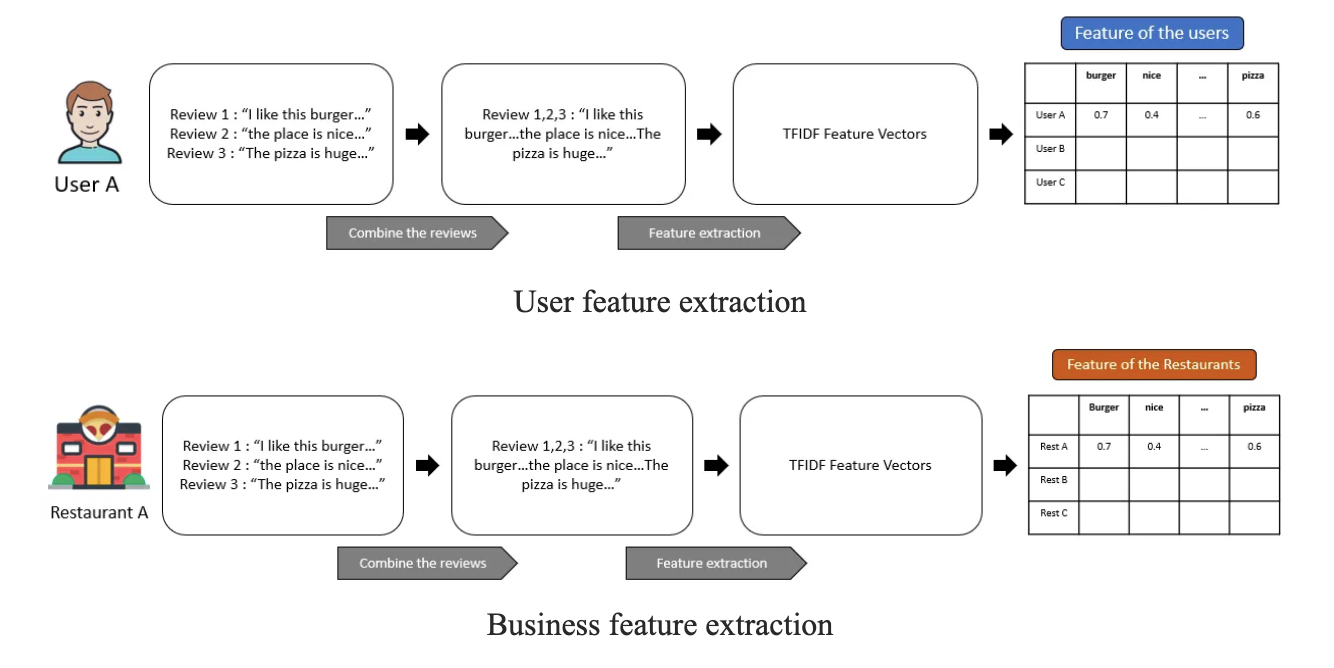

After feature extraction, the next step involves reducing the dimensionality of the feature matrices. Dimensionality reduction techniques like Principal Component Analysis (PCA) are applied to identify the most important and informative features while minimizing the loss of information. PCA transforms the feature matrices into a lower-dimensional space by capturing the maximum variance in the data. This reduction in dimensionality helps improve computational efficiency without significantly compromising the performance of the recommendation system. The 700 features were selected from user data.
Once the features are extracted, the matrix factorization process begins. The latent factors are optimized using the equation of least square error, with the goal of minimizing the error between predicted ratings and actual ratings. Gradient Descent is commonly used to iteratively update the feature values in the user and item matrices, gradually improving the accuracy of the predictions.
Given a user ID, the system retrieves the reviews associated with that user. Using the optimized matrices, the system predicts the restaurants that the user is most likely to enjoy based on their preferences. These predictions serve as recommendations, indicating the restaurants that align with the user's taste.

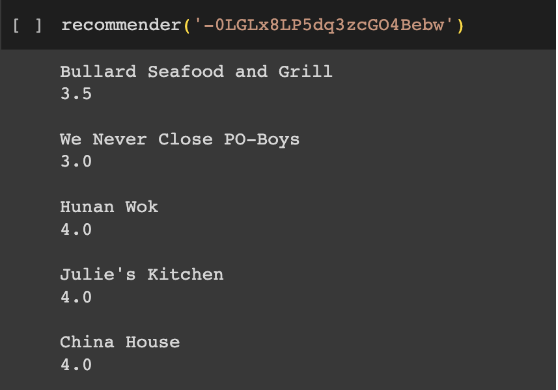

Matrix Factorization, coupled with feature extraction from text data, provides a powerful approach to building a restaurant recommendation system. By decomposing the large rating matrix into user-feature and item-feature matrices, the system effectively captures users' preferences and restaurant characteristics.
By optimizing the latent factors and utilizing the resulting matrices, the system generates accurate restaurant recommendations for users, enhancing their dining experiences.


## **Evaluation**

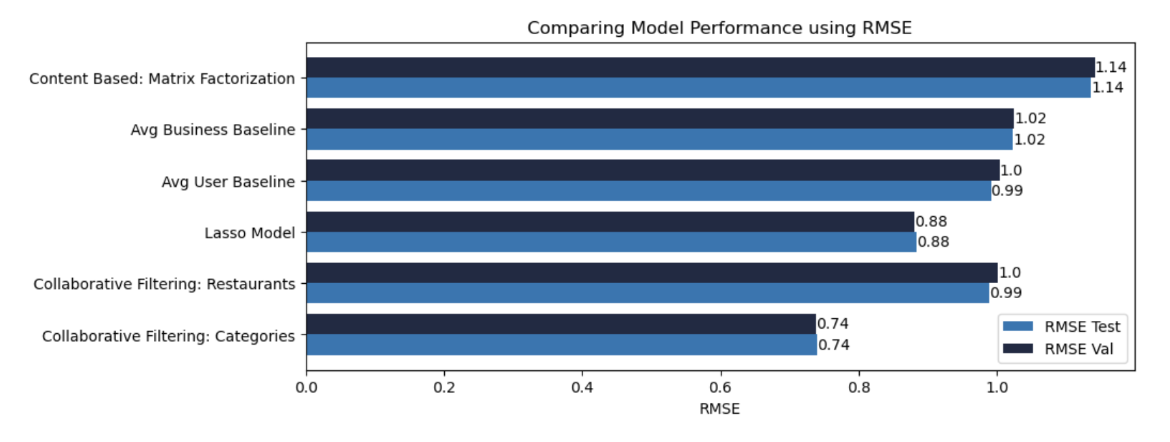

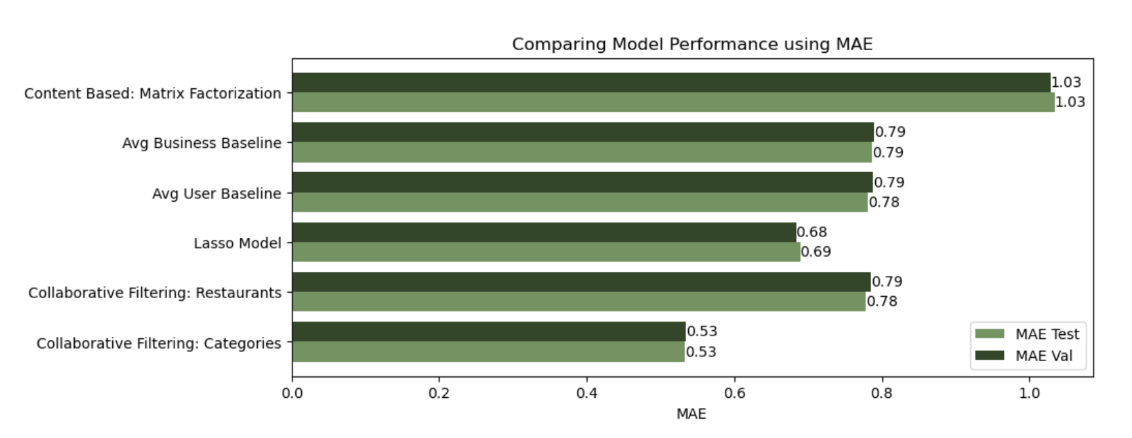

Between the three models we tried, the collaborative filter based on the restaurant categories had the lowest RMSE and MAE. We hypothesize that the restaurant category based filter performed the best due to the lower sparsity compared to filtering by individual restaurants. Furthermore, by averaging the reviews per category, we were able to represent users in a more holistic way compared to analyzing individual ratings. This hypothesis is supported by the fact that the collaborative filter based on individual restaurants was not able to outperform the baseline methods. The sparsity for the interaction matrix when looking at individual restaurants was nearly 96%, which made it challenging to find meaningful latent features and optimize the decomposition.  

The content based filter also failed to outperform the baselines, possibly because we consolidated all the reviews for each user into a single document for processing. This acclamation includes reviews for the restaurants the user loved but also restaurants the user disliked. Furthermore, by using a TF-IDF embedding, we are losing the context that each word is used in in the reviews. As such, the model cannot differentiate between restaurants liked by the user with restaurants disliked by the user and is filtering based on word count. It is also interesting to note that none of the recommended restaurants overlap between the content based and collaborative based filtering. 


## **Conclusion**

The restaurant recommender system is designed to provide personalized restaurant suggestions to users based on their past behavior and the behavior of similar users. It's a practical application of artificial intelligence in the food and hospitality sector, with potential for scalability and further refinement to deliver increasingly accurate and satisfying recommendations to end-users. To construct an effective recommendation system, we worked with real world data from Yelp. As the Yelp dataset contains raw data straight from the Yelp website, it needed much cleaning to obtain useful features. Furthermore, because the original files were in JSON format with multiple layers of nested dictionaries, we were unsuccessful in parsing all of the information and could not use many of the interesting features in the dataset. The volume of the dataset also presented a challenge both in terms of data size and computation load and also in terms of sparsity. The subset of data that we worked with contained 201,608 users, many of whom had very few reviews across the 2255 restaurants in the subset. 

To build a successful recommender in the face of such high sparsity, we experimented with many different architectures, namely, using the user text reviews in a content based filter and building collaborative filters based on individual restaurants, restaurant categories, and KNN clustering on individual restaurants. The most successful filter was the collaborative filter based on the restaurant categories with an RMSE and MAE of 0.739 and 0.533, respectively, on the test set. This model outperformed our baselines by 15% on both metrics. Further work, such as combining the text reviews with the collaborative filtering engine can be done to refine model performance.


## **Attribution**

Rahul: I worked on creating a json to csv parser, reading and sub-sampling the huge dataset through pyspark, text data pre-processing, building the naive bayes classifier to predict the user ratings by just the text data, and building content based recommender using Matrix Factorization. Overall, data wrangling, cleaning and building content based models have contributed most of my commits.

syed: I worked on converting json to csv, EDA, data preprocessing, building a KNN based collabrative filtering model using restaurants star rating. Overall, data exploration, cleaning and building the collaborative filter.

Analee: I worked on parsing the json, eda, building a logistic regression for rating prediction, building a lasso regression for rating prediction, building a collaborative filtering model using restaurant categories and then the cleaned restaurant categories. Overall, data exploration, building the baselines and the collaborative filter contributed to most of my commits.

Zoya: I mainly worked on the data cleaning, data preprocessing, building a SVM for rating prediction, calculating the average user and business baselines, and building a collaborative filter based on the individual restaurants. Overall, the data cleaning and building the collaborative filter and trying to fine tune the collaborative filter contributed most to my commits.